# Questrade Portfolio Manager

In [6]:
import os
import sys

currDir = os.getcwd()
parentDir = os.path.abspath(os.path.join(currDir, os.pardir))
grandParentDir = os.path.abspath(os.path.join(parentDir, os.pardir))

# print(currDir)
# print(parentDir)
# print(grandParentDir)

sys.path.append(parentDir) # append parent path
sys.path.append(grandParentDir) # append home repo dir

In [7]:
import math
import requests
import numpy as np
import pandas as pd
import datetime as dt
from credentials import EDDIE_QUESTRADE_API_CODE, EDDIE_ACCOUNT_TYPE
import matplotlib.pyplot as plt
from questrade import QuestradeBot

## Personal Inputs and QuestradeBot Initialization

In [8]:
qbot = QuestradeBot(EDDIE_QUESTRADE_API_CODE)

refresh_token


## Multiple Accounts Management

In [9]:
acctNums = qbot.get_account_ids()

In [10]:
acctData = {}
ACCOUNT_TYPE = EDDIE_ACCOUNT_TYPE
for aNum in acctNums:
    if aNum in ACCOUNT_TYPE:
        aName = ACCOUNT_TYPE[aNum]
        
        if aName == 'Stock Portfolio':
            stock_bal = qbot.get_balance(aNum)
            stock_portfolio = qbot.get_investment_summary(aNum)
            stock_return = (stock_portfolio['Return (%)'].dot(stock_portfolio['Portfolio (%)'])) / 100
            stock_dividends = qbot.get_dividend_income(aNum)
        if aName == 'Quant Portfolio':
            quant_bal = qbot.get_balance(aNum)
            quant_portfolio = qbot.get_investment_summary(aNum)
            quant_return = (quant_portfolio['Return (%)'].dot(quant_portfolio['Portfolio (%)'])) / 100
            quant_dividends = qbot.get_dividend_income(aNum) 
    else:
        print("Please define portfolio first in credentials.py")

## US Stock Investing

### Stock Portfolio Balance

In [11]:
stock_bal

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.336500,0.00,31785.336500,100.00,0.00
USD,12871.673943,9323.97,22195.643943,57.99,42.01


### Stock Portfolio

In [12]:
stock_portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,540.96,-8.41,5.80
O,REALTY INCOME CORP,USD,75,5221.50,13.76,56.00
JPM,JPMORGAN CHASE & CO.,USD,6,980.82,6.52,10.52
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,688.11,17.22,7.38
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,733.26,14.69,7.86
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,583.52,-3.82,6.26
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,575.80,-2.93,6.18


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

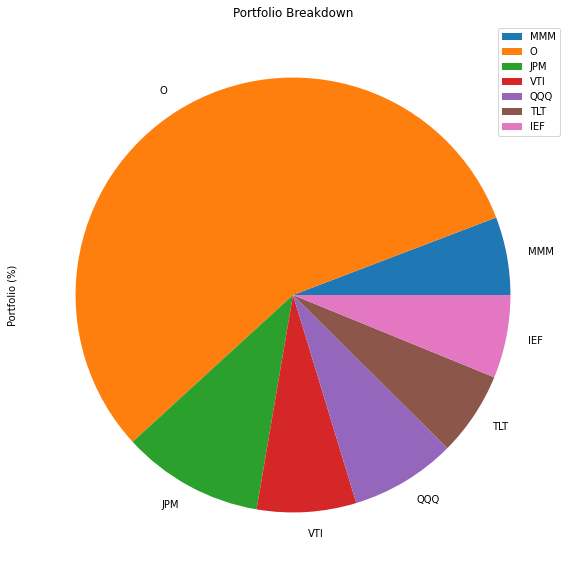

In [13]:
stock_portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

### Stock Portfolio Return

In [14]:
stock_return

9.908987999999999

### Stock Dividends

In [15]:
stock_dividends.loc['Total'] = stock_dividends.sum(numeric_only=True, axis=0)
stock_dividends.tail()

,Monthly_Dividend_Income
2021-07,16.67
2021-08,20.57
2021-09,21.64
2021-10,0.97
Total,190.21


## TAA Quantitative Investing

### Quant Balance

In [16]:
quant_bal

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,0,0,0,0.0,0.0
USD,10000,0,10000,100.0,0.0


### Quant Portfolio

In [17]:
quant_portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)


C:\Users\eshin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

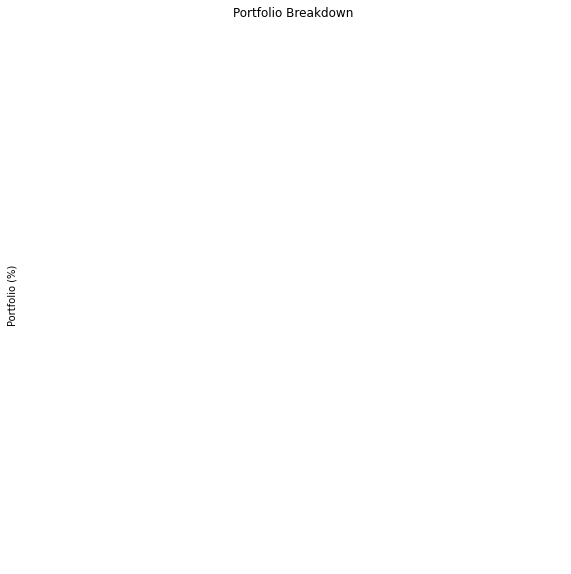

In [18]:
quant_portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

### Quant Portfolio Return

In [19]:
quant_return

0.0

### Quant Dividends

In [20]:
quant_dividends.loc['Total'] = quant_dividends.sum(numeric_only=True, axis=0)
quant_dividends.tail()

,Monthly_Dividend_Income
2021-07,0
2021-08,0
2021-09,0
2021-10,0
Total,0


<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

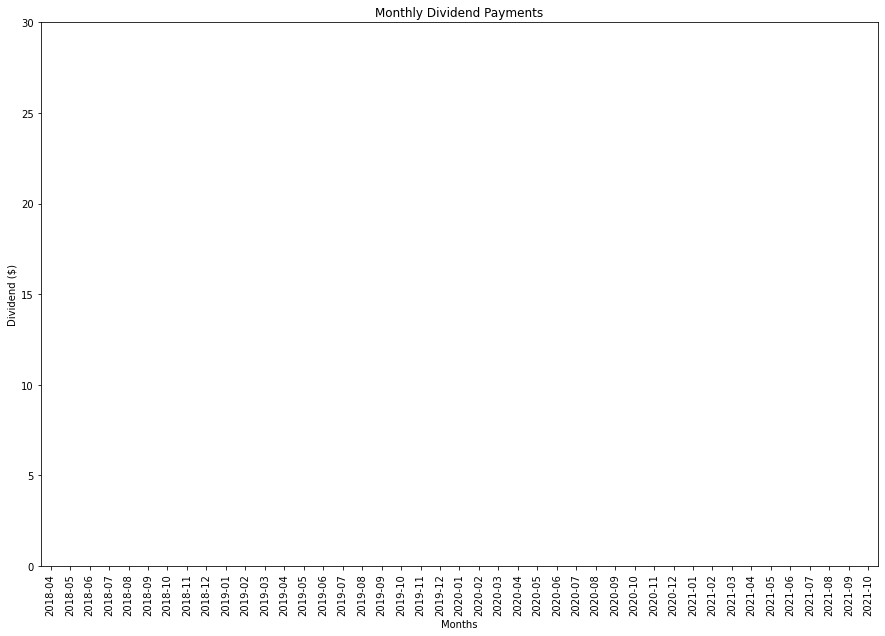

In [21]:
quant_dividends[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))